<a href="https://colab.research.google.com/github/momna763/DIP/blob/main/DipLab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


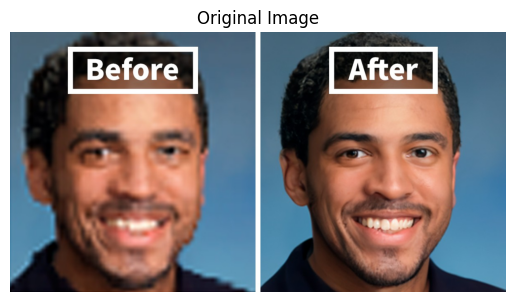

In [25]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/before-after.png'


image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

brightness_value = 50  # Increase brightness (use negative values to decrease brightness)
bright_image = np.clip(image_rgb + brightness_value, 0, 255).astype(np.uint8)


plt.imshow(bright_image)
plt.title("Brightened Image")
plt.axis('off')
plt.show()


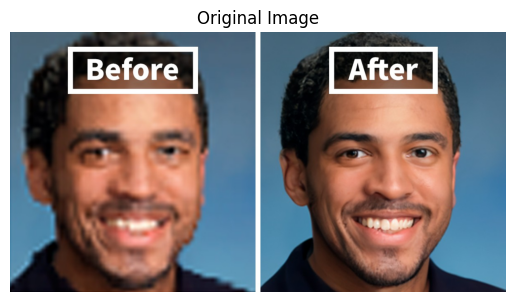

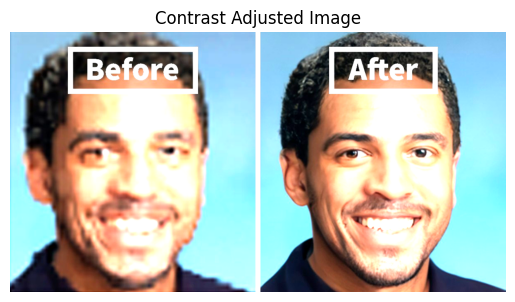

In [13]:
# Step 1: Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Provide the path to your image
image_path = '/content/drive/MyDrive/before-after.png'  # Replace this with your image path

# Step 3: Read the image
image = cv2.imread(image_path)

# Step 4: Check if the image was loaded successfully
if image is None:
    print("Error: Image not found. Please check the file path.")
else:
    # Step 5: Convert the image to RGB (OpenCV uses BGR by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Step 6: Display the original image
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis('off')  # Hide axes for better display
    plt.show()

    # Step 7: Set contrast and brightness values
    alpha = 2.0  # Contrast control (1.0-3.0)
    beta = 0     # Brightness control (0-100)

    # Step 8: Apply contrast adjustment formula
    contrast_image = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)

    # Step 9: Display the contrast adjusted image
    plt.imshow(contrast_image)
    plt.title("Contrast Adjusted Image")
    plt.axis('off')
    plt.show()


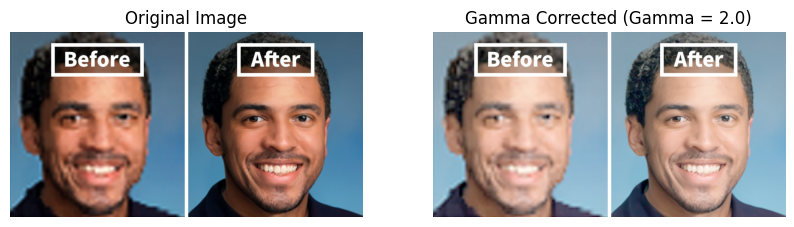

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/before-after.png'


image = cv2.imread(image_path)


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


image_normalized = image_rgb / 255.0


gamma = 2.0


gamma_corrected = np.power(image_normalized, 1.0 / gamma)


gamma_corrected = (gamma_corrected * 255).astype(np.uint8)


plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Gamma corrected image
plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected)
plt.title(f"Gamma Corrected (Gamma = {gamma})")
plt.axis('off')

plt.show()


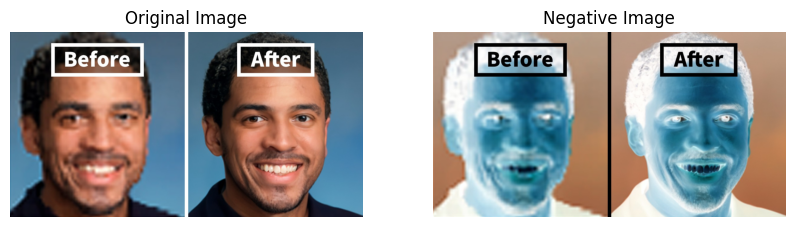

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/before-after.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

negative_image = 255 - image_rgb

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_image)
plt.title("Negative Image")
plt.axis('off')

plt.show()

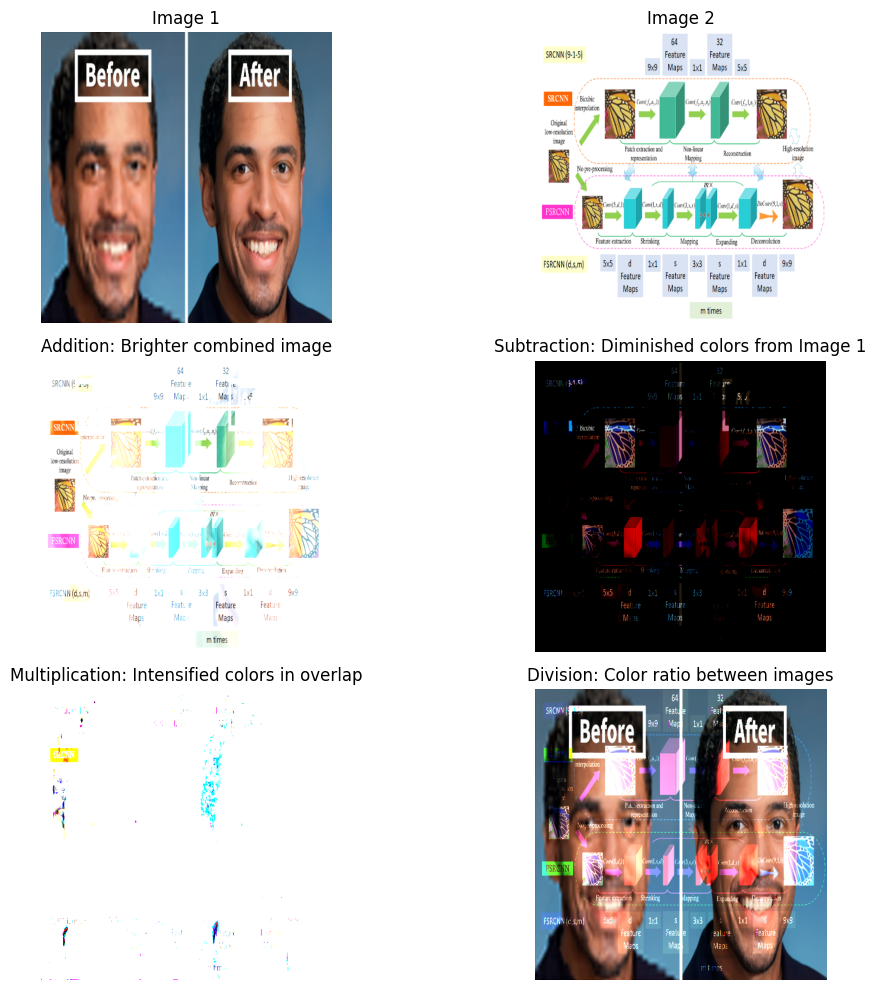

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
image1_path = '/content/drive/MyDrive/before-after.png'  # Replace with your first image path
image2_path = '/content/drive/MyDrive/img.png'  # Replace with your second image path

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Ensure both images are the same size
image1_rgb = cv2.resize(image1_rgb, (500, 500))
image2_rgb = cv2.resize(image2_rgb, (500, 500))

# Diadic operations
added_image = cv2.add(image1_rgb, image2_rgb)
subtracted_image = cv2.subtract(image1_rgb, image2_rgb)
multiplied_image = cv2.multiply(image1_rgb, image2_rgb)
divided_image = cv2.divide(image1_rgb, image2_rgb, scale=255)

# Plotting the results
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.imshow(image1_rgb)
plt.title("Image 1")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(image2_rgb)
plt.title("Image 2")
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(added_image)
plt.title("Addition: Brighter combined image")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(subtracted_image)
plt.title("Subtraction: Diminished colors from Image 1")
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(multiplied_image)
plt.title("Multiplication: Intensified colors in overlap")
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(divided_image)
plt.title("Division: Color ratio between images")
plt.axis('off')

plt.tight_layout()
plt.show()


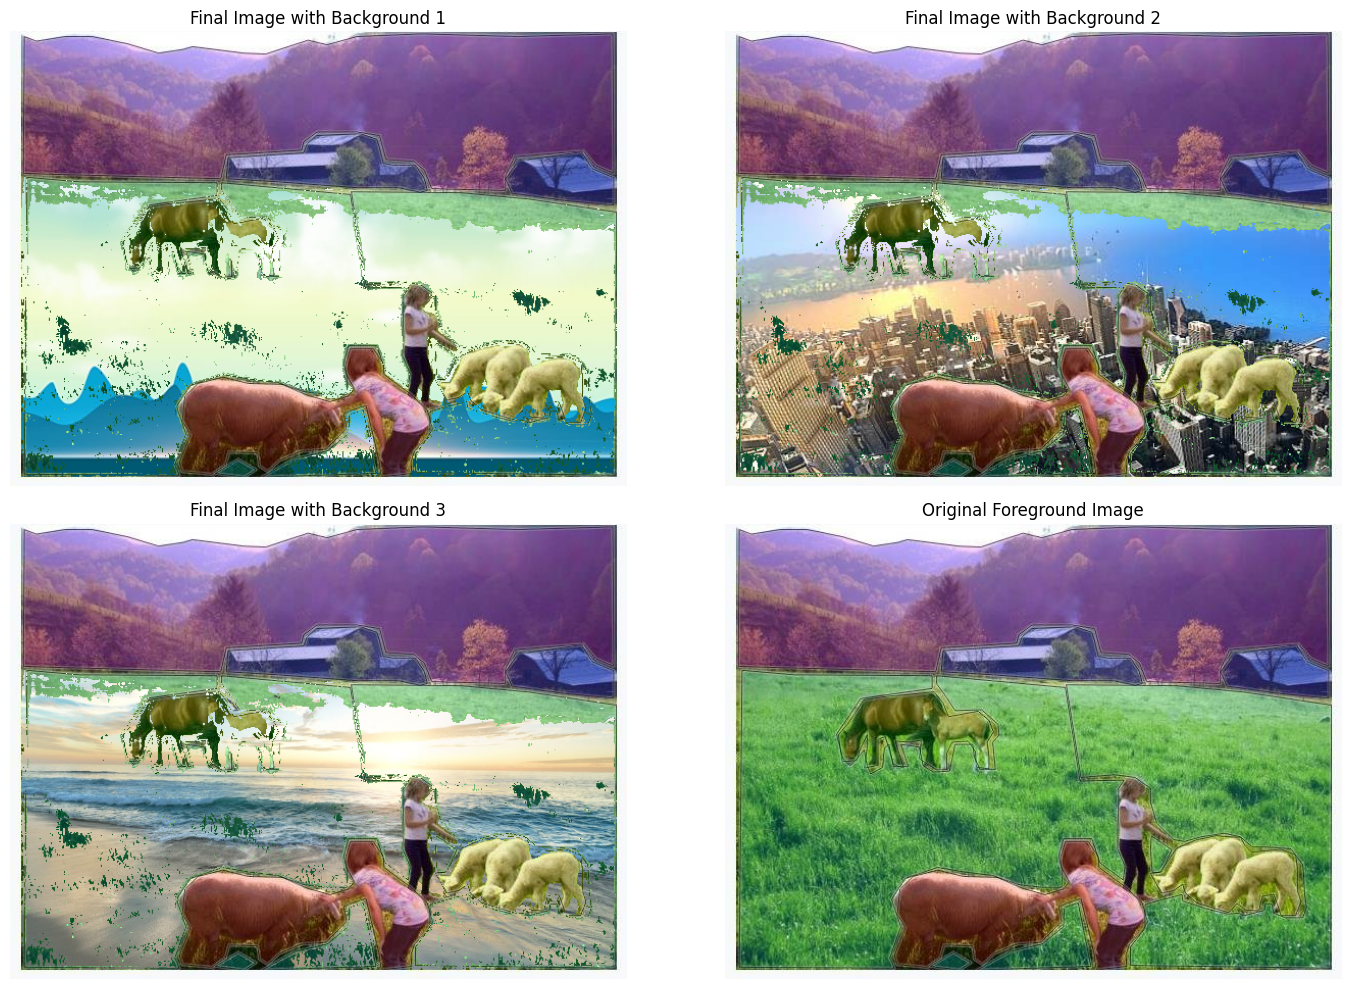

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

foreground_image_path = '/content/drive/MyDrive/greenscreen_image.png'
background1_path = '/content/drive/MyDrive/background1.png'
background2_path = '/content/drive/MyDrive/background2.png'
background3_path = '/content/drive/MyDrive/background3.png'

foreground_image = cv2.imread(foreground_image_path)
background1 = cv2.imread(background1_path)
background2 = cv2.imread(background2_path)
background3 = cv2.imread(background3_path)

hsv_image = cv2.cvtColor(foreground_image, cv2.COLOR_BGR2HSV)

lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

mask = cv2.inRange(hsv_image, lower_green, upper_green)
mask_inv = cv2.bitwise_not(mask)
fg_part = cv2.bitwise_and(foreground_image, foreground_image, mask=mask_inv)

# Resize backgrounds to match foreground size
background1 = cv2.resize(background1, (foreground_image.shape[1], foreground_image.shape[0]))
background2 = cv2.resize(background2, (foreground_image.shape[1], foreground_image.shape[0]))
background3 = cv2.resize(background3, (foreground_image.shape[1], foreground_image.shape[0]))

def replace_background(background, fg_part, mask):
    bg_part = cv2.bitwise_and(background, background, mask=mask)
    final_image = cv2.add(fg_part, bg_part)
    return final_image

final_image1 = replace_background(background1, fg_part, mask)
final_image2 = replace_background(background2, fg_part, mask)
final_image3 = replace_background(background3, fg_part, mask)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(final_image1, cv2.COLOR_BGR2RGB))
plt.title("Final Image with Background 1")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(final_image2, cv2.COLOR_BGR2RGB))
plt.title("Final Image with Background 2")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(final_image3, cv2.COLOR_BGR2RGB))
plt.title("Final Image with Background 3")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(foreground_image, cv2.COLOR_BGR2RGB))
plt.title("Original Foreground Image")
plt.axis('off')

plt.tight_layout()
plt.show()


In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

frame1_path = '/content/drive/MyDrive/frame1.png'
frame2_path = '/content/drive/MyDrive/frame2.png'

frame1 = cv2.imread(frame1_path)
frame2 = cv2.imread(frame2_path)

frame1 = cv2.resize(frame1, (640, 480))
frame2 = cv2.resize(frame2, (640, 480))

gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

diff = cv2.absdiff(gray1, gray2)

_, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), np.uint8)
morphed = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output_frame = frame1.copy()
for contour in contours:
    if cv2.contourArea(contour) > 500:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(output_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.title("Frame 1")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.title("Frame 2")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
plt.title("Detected Motion")
plt.axis('off')

plt.tight_layout()
plt.show()
